<a href="https://colab.research.google.com/github/matheus-bokus/metodos_numericos/blob/master/Copy_of_Desafio_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from itertools import zip_longest

In [0]:
def metodo_rk4(fk,yk0, xk0, xkf,  hk): #a2=2/3
    itk = int((xkf-xk0)/hk)
    yk = np.zeros(itk+1)
    yk[0] = yk0
    for i in range(itk):
        xki = xk0+i*hk
        k1k= fk(xki,yk[i])
        #k2=f(xi+3/4h,yi+3/4k1h)
        k2k = fk(xki+hk/2,yk[i]+k1k*hk/2)
        #k3=f(xi+h/2,yi+(h/2)k2)
        k3k=fk(xki+hk/2,yk[i]+hk*k2k/2)
        #k4=f(xi+h,yi+h*k3)
        k4k=fk(xki+hk,yk[i]+hk*k3k)
        #yi+1=yi+(1/6)*(k1+2k2+2k3+k4)h
        yk[i+1] = yk[i]+(1/6)*(k1k+2*k2k+2*k3k+k4k)*hk
    return yk

In [0]:
def reg_quad(x,y):
  a=sum(x)
  b=sum(x*y)
  c=sum((x**2)*y)
  d=sum(x**2)
  e=sum(x**3)
  f=sum(x**4)
  g=sum(y)
  vetx=np.linalg.solve([[len(x),a,d],[a,d,e],[d,e,f]],[g,b,c])
  return P([vetx[0],vetx[1],vetx[2]])

In [0]:
def d_progressiva(func1,x,xi): 
  return (func1(xi)-func1(x))/(xi-x)

In [0]:
def d_regressiva(func1,x,xa):
  return (func1(x)-func1(xa))/(x-xa)

In [0]:
def d_central(func1,xi,xa):
  return (func1(xi)-func1(xa))/(xi-xa)

In [0]:
def deriva(func1,xi,x):
  if xi==x[0]:
    return d_progressiva(func1,x[1],x[0])
  if xi>x[0] and xi<x[-1]:
    return d_central(func1,x[int(np.where(x==xi)[0])+1],x[int(np.where(x==xi)[0])-1])
  else:
    return d_regressiva(func1,xi,x[-2])

# Desafio EDO

O crescimento populacional de organismo tem muitas aplicações em engenharia e na ciência. Um dos modelos mais simples assume que a taxa de mudança da população $p$ é proporcional a população existente em qualquer tempo $t$:

$$\frac{dp}{dt} = k_g p$$

onde $k_g$ =  taxa de crescimento. A população mundial em milhões de 1950 a 2000 foi:

t|p
--|--
1950|2560
1955|2780
1960|3040
1965|3350
1970|3710
1975|4090
1980|4450
1985|4850
1990|5280
1995|5690
2000|6080

1. Utilize os dados de 1950 a 1970 para estimar $k_g$

2. Utilize o método de RK4 junto com a estimativa de $k_g$ para estimar a população de 1950 a 2050 com intervalo de 5 anos entre cada estimativa. Mostre os dados da simulação em um gráfico.

## 1. Estimando Kg

Utlizando os valores de 1950 a 1970, Kg foi estimado utilizando o método da Regressão Quadrática, pois o próximo quesito vai utilizar valores de tempo além do intervalo que foi dado

In [0]:
t=np.array([1950,1955,1960,1965,1970])
p=np.array([2560,2780,3040,3350,3710])
form=reg_quad(t,p)
[form(tempo) for tempo in t]

[2561.1428224639967,
 2777.428588529583,
 3040.857177297119,
 3351.4285887670703,
 3709.14282293804]

Dessa forma, Kg pode ser obtido, através da derivada da função obtida num ponto, dividido pelo próprio valor da população. Como a taxa de crescimento pode variar conforme o tempo, foi usada a média dos valores obtidos, para minimizar os erros, logo:




In [0]:
kg=np.mean([deriva(form,tempo,t)/form(tempo) for tempo in t])
print("kg={}".format(kg))

kg=0.018453298912931734


## 2. Estimando a População de 1950 a 2050

Tendo a estimativa do coeficiente Kg, e substituinfo na expressão:

$$\frac{dp}{dt}=0.018453298912931734p$$

In [0]:
def fp(t,p):
  return 0.018453298912931734*p

In [0]:
resp=metodo_rk4(fp,2560,1950,2050,5)
resp

array([ 2560.        ,  2807.44186801,  3078.80071962,  3376.38829825,
        3702.73979342,  4060.63543843,  4453.12419553,  4883.54973045,
        5355.57889756,  5873.23297829,  6440.92193899,  7063.48200003,
        7746.21683625,  8494.94275966,  9316.03826945, 10216.49839125,
       11203.99426875, 12286.93851523, 13474.55688175, 14776.9668526 ,
       16205.26383755])

In [0]:
t1=np.arange(1950,2055,5)
form(t1)

array([ 2561.14282246,  2777.42858853,  3040.8571773 ,  3351.42858877,
        3709.14282294,  4113.99987981,  4565.99975938,  5065.14246166,
        5611.42798664,  6204.85633432,  6845.4275047 ,  7533.14149778,
        8267.99831357,  9049.99795205,  9879.14041324, 10755.42569713,
       11678.85380372, 12649.42473302, 13667.13848501, 14731.99505971,
       15843.99445711])

In [0]:
print(resp[-1])
print(form(2050))

16205.26383755321
15843.994457107503


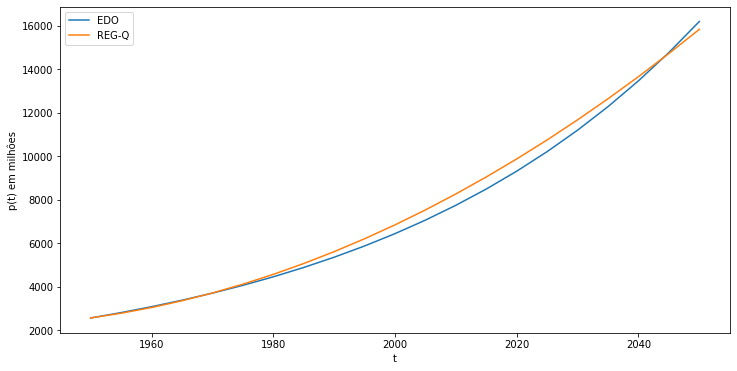

In [0]:
t1=np.arange(1950,2055,5)
plt.figure(figsize=(12,6))
plt.plot(t1,resp,'-')
plt.plot(t1,form(t1),'-')
plt.xlabel('t')
plt.ylabel('p(t) em milhôes')
plt.legend(['EDO',"REG-Q"], loc=0)
plt.show()

##Resultado

 Como dito acima, a própria taxa de crescimento da população varia em função do tempo e da região analisada, logo, essa estimava vai apresentar erros, principalmente a longo prazo, como foi visto com os anos próximos a 2050, cuja estimativa da ONu é de 9.7 bilhôes de pessoas, e o resultado alcançado foi de $\approx 15.844$ bilhôes através do método de Rk4, e $\approx 16.205$ Bilhôes através da regressão Quadrática.

## Referências


O Baricentro da mente. Regressão Polinomial. Disponível em: obaricentrodamente.com/2010/07/regressao-polinomial.html. Acesso: 05/01/2020

ONU.População mundial deve chegar a 9,7 bilhões de pessoas em 2050, diz relatório da ONU. Disponível em: https://nacoesunidas.org/populacao-mundial-deve-chegar-a-97-bilhoes-de-pessoas-em-2050-diz-relatorio-da-onu/. Acesso: 05/01/2020